# 2. Statistical Learning – Applied

Excercises from **Chapter 2** of [An Introduction to Statistical Learning](http://www-bcf.usc.edu/~gareth/ISL/) by Gareth James, Daniela Witten, Trevor Hastie and Robert Tibshirani.

I've elected to use Python instead of R.

### Question 8 – College dataset

In [210]:
# 8(a) read the data

df_c = pd.read_csv('data/College.csv')

# 8(b) label rows by college
df_college = df_c.set_index(['Unnamed: 0'], append=True, verify_integrity=True)
df_college.rename_axis([None, 'College'], inplace=True)
df_college.head()

,,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
,College,,,,,,,,,,,,,,,,,,
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [112]:
# 8(c)i get statistical summary
df_college.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


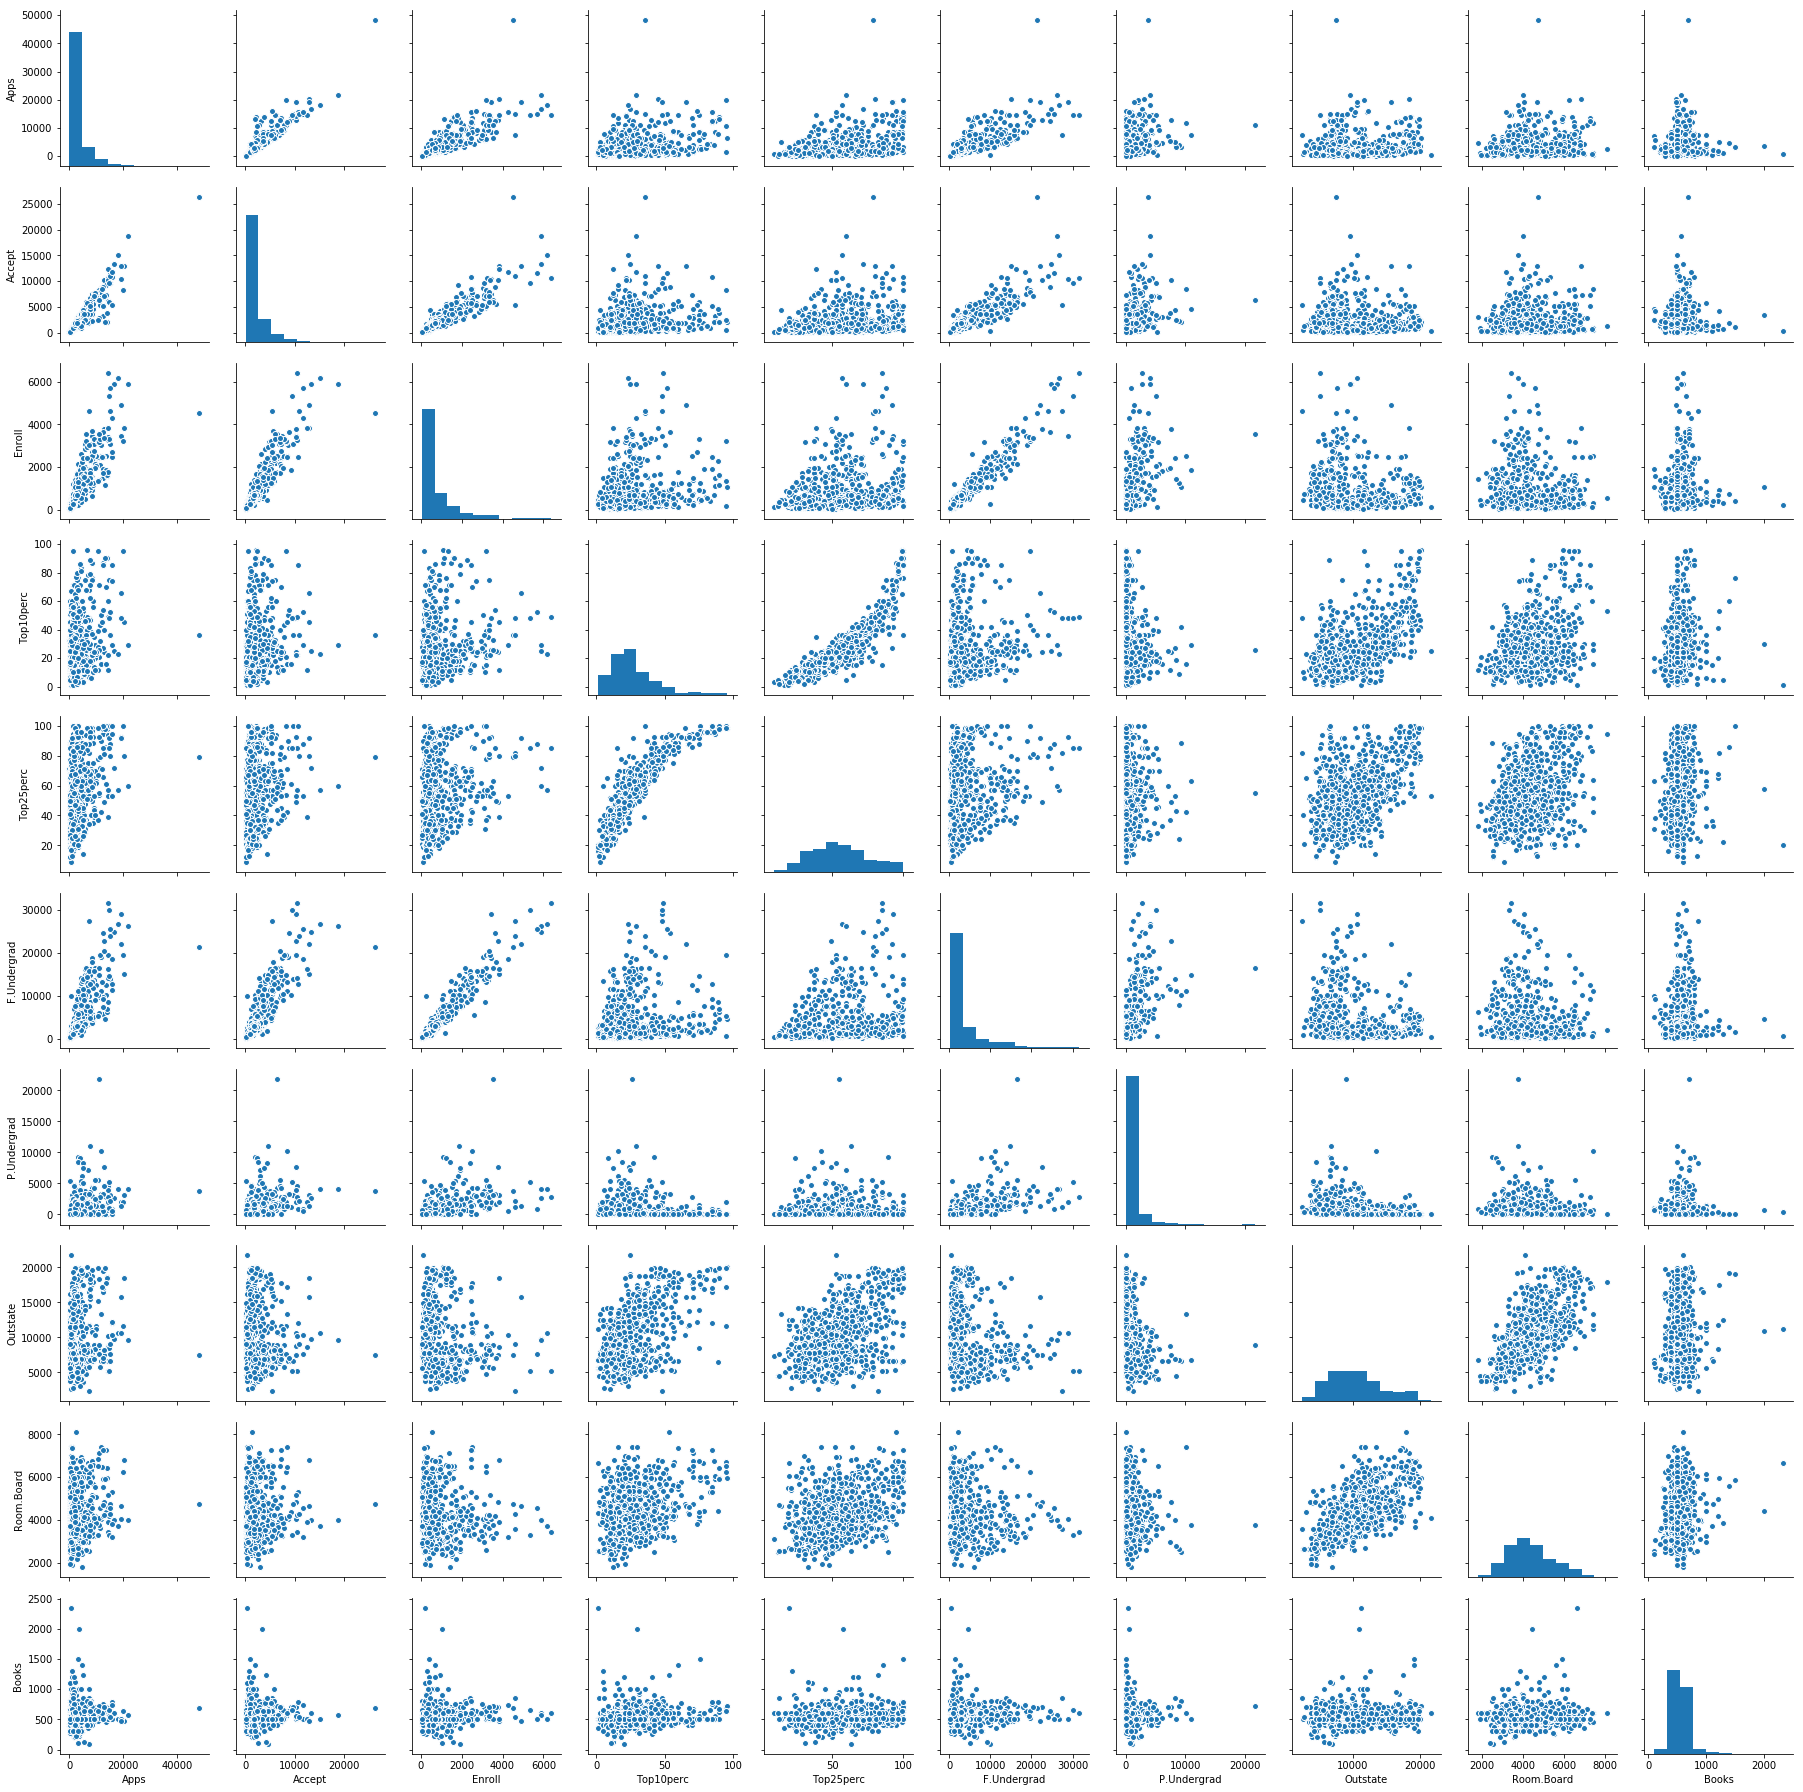

In [117]:
# 8(c)ii produce a scatterplot matrix of the first ten columns or variables of the data
sns.pairplot(df_college.iloc[:, 1:11]);

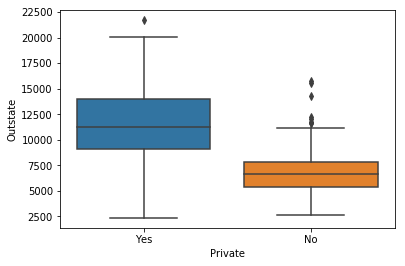

In [127]:
# 8c iii. produce side-by-side boxplots of Outstate versus Private.
sns.boxplot(x=df_college['Private'], y=df_college['Outstate']);

In [131]:
# 8c iv. Create a new qualitative variable, called Elite, by binning the Top10perc variable. 
# We are going to divide universities into two groups based on whether or not the proportion 
# of students coming from the top 10% of their high school classes exceeds 50 %.

df_college['Elite'] = df_college['Top10perc'] > 50

In [139]:
#  8c iv. see how many elite universities there are.
df_college['Elite'].sum()

78

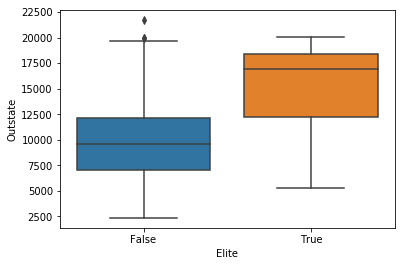

In [140]:
# Now use the plot() function to produce side-by-side boxplots of Outstate versus Elite.
sns.boxplot(x=df_college['Elite'], y=df_college['Outstate']);

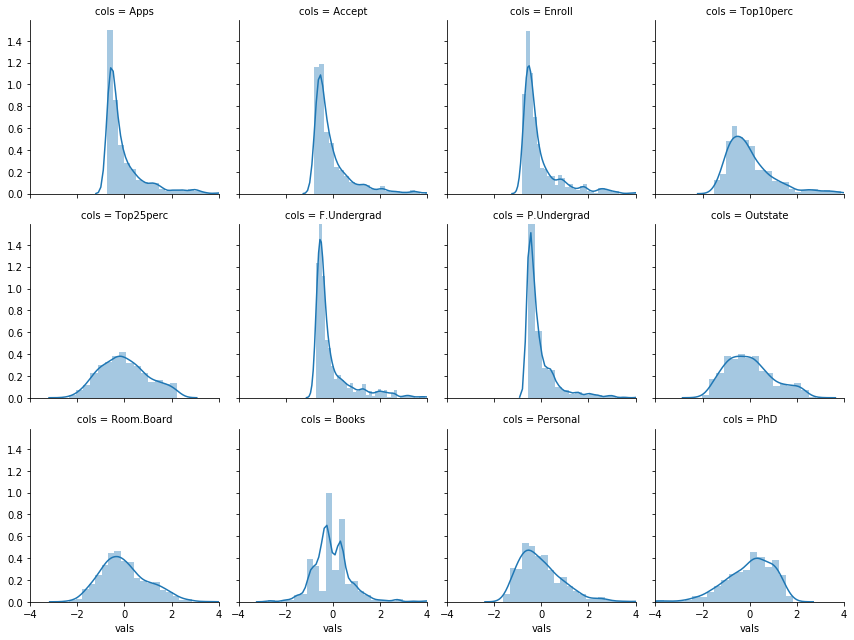

In [207]:
# 8c v. Use the hist() function to produce some histograms with differing numbers of bins 
# for a few of the quantitative variables.

def scale(df):
    """Xi = Xi - mu(Xi) / s(Xi)
    mu -> mean
    s -> standard deviation"""
    return (df-df.mean())/(df.std())


feature_count = 12

# Remove units
df_norm = scale(df_college.iloc[:, 1:feature_count+1])
# Recast data into long format using melt
df_meltd = df_norm.melt(var_name='cols', value_name='vals')


# Plot grid of plots
g = sns.FacetGrid(df_meltd, col='cols', col_wrap=4)
g.map(sns.distplot, 'vals')
g.set(xlim=(-4, 4));

### Question 9 – College dataset

In [255]:
auto = pd.read_csv('data/Auto.csv')

auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [267]:
# Check for missing values
auto.isnull().any(axis=1).sum() == 0
# ...there are none
# ah, ? is used for missing values
auto = auto.drop(auto[auto.values == '?'].index)
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


(a) Which of the predictors are quantitative, and which are qualitative?

| key | description |
| --- | --- |
| mpg | miles per gallon |
| cylinders | Number of cylinders between 4 and 8 |
| displacement | Engine displacement (cu. inches) |
| horsepower | Engine horsepower |
| weight | Vehicle weight (lbs.) |
| acceleration | Time to accelerate from 0 to 60 mph (sec.) |
| year |Model year (modulo 100) |
| origin | Origin of car (1. American, 2. European, 3. Japanese) |
| name | Vehicle name |

In [270]:
datatypes = {'quant': ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration'],
             'qual': ['origin', 'name']}

auto_quant = auto[datatypes['quant']].astype(np.float_)


In [304]:
# (b) What is the range of each quantitative predictor?
# (c) What is the mean and standard deviation of each quantitative predictor?

pd.DataFrame({'range': auto_quant.max() - auto_quant.min(),
              'mean': auto_quant.mean(),
              'std': auto_quant.std()})

,range,mean,std
mpg,37.6,23.445918,7.805007
cylinders,5.0,5.471939,1.705783
displacement,387.0,194.411990,104.644004
horsepower,184.0,104.469388,38.491160
weight,3527.0,2977.584184,849.402560
acceleration,16.8,15.541327,2.758864


In [303]:
# (d) Now remove the 10th through 85th observations. 
# What is the range, mean, and standard deviation of each predictor 
# in the subset of the data that remains?

# drop observations 10 to 85
auto_quant_d = auto_quant.drop(auto_quant.index[10: 85])
# results as dataframe
pd.DataFrame({'range': auto_quant_d.max() - auto_quant_d.min(),
              'mean': auto_quant_d.mean(),
              'std': auto_quant_d.std()})



,range,mean,std
mpg,35.6,24.374763,7.872565
cylinders,5.0,5.381703,1.658135
displacement,387.0,187.880126,100.169973
horsepower,184.0,101.003155,36.003208
weight,3348.0,2938.854890,811.640668
acceleration,16.3,15.704101,2.719913


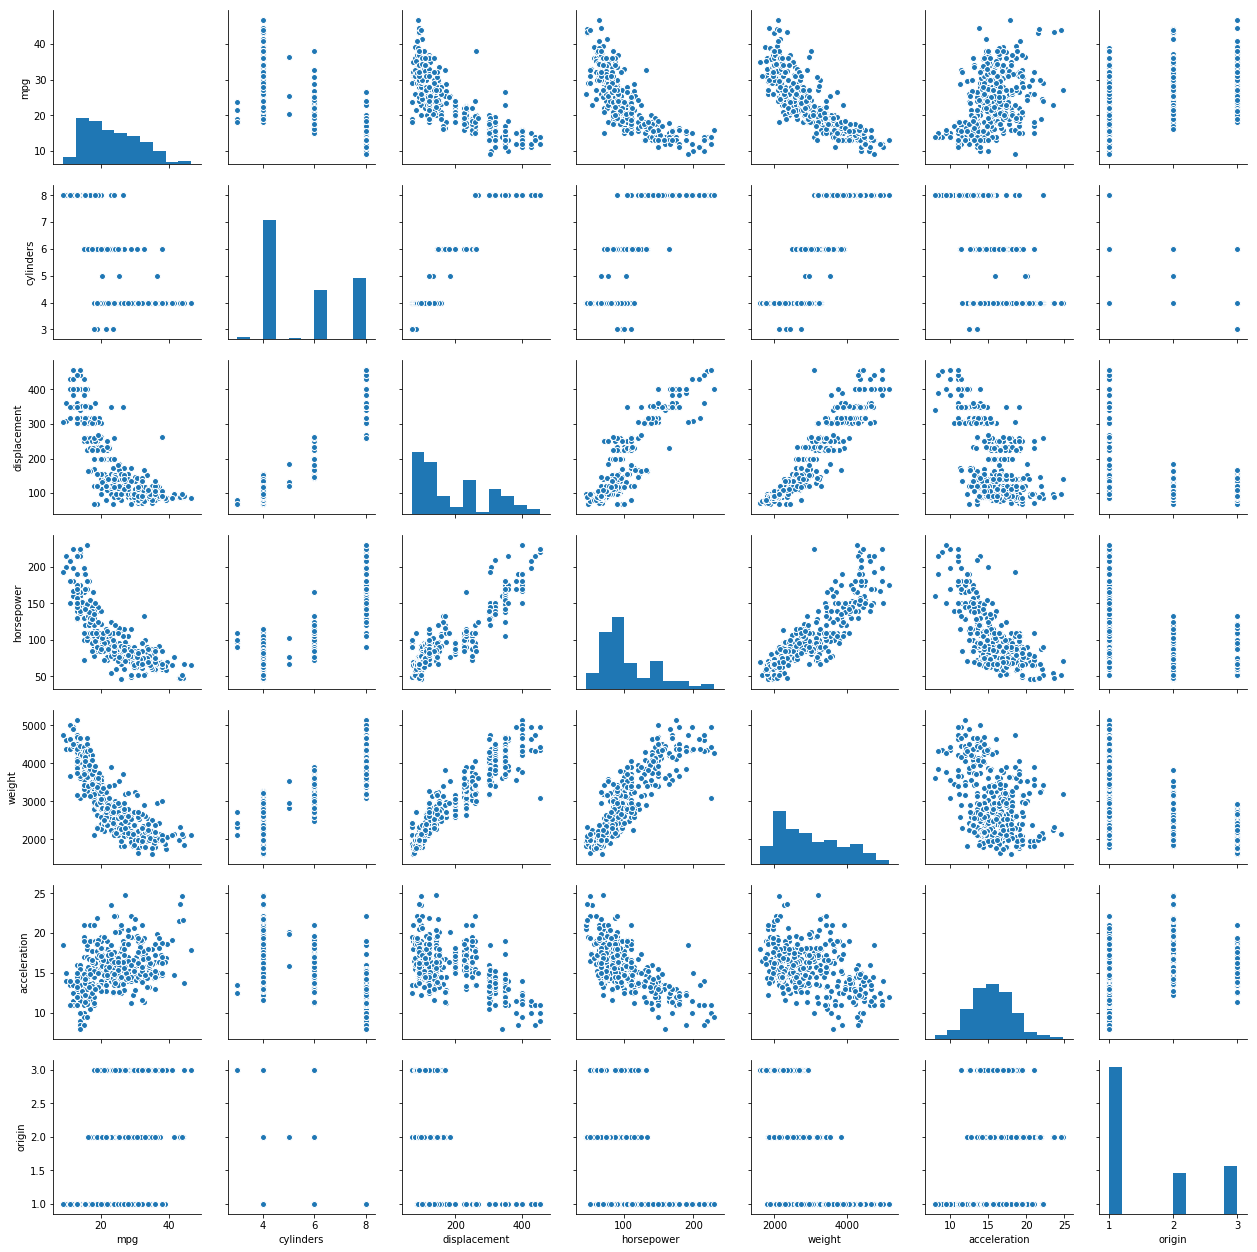

In [312]:
# (e) Using the full data set, investigate the predictors graphically, 
# using scatterplots or other tools of your choice. Create some plots 
# highlighting the relationships among the predictors. Comment on your findings.

# combine numeric quantitive data with original qualitive data
auto_n = pd.concat([auto_quant, auto[datatypes['qual']]], axis=1)
# pairplot grid
sns.pairplot(auto_n);


Comments:
- mpg appears to correlate strongly with weight, hordsepower and displacement. These relationships are non-linear and appear to be exponential. The distribution of mpg is skewed
- the relationships between displacement, horespower, and weight appear to be linear
- cylinder count correlate positively with displacement, horespower, and weight and negatively with mpg
- the relationship between acceleration and other features seems weekly correlated. horsepower is perhaps most strongly correlated. acceleration has a normal distribution

(f) Suppose that we wish to predict gas mileage (mpg) on the basis of the other variables. 
Do your plots suggest that any of the other variables might be useful in predicting mpg? 
ustify your answer.

Looking at the plots above, displacement, horsepower and weight seem most strongly correlated with mpg. It also seems to be a discernible relationship with cylinders and origin which we might try including in our analysis.

Accelration is not strongly correllated with mpg, so we might consider dropping this feature.
